# Download intent

# Import Library

In [2]:
from email import message
import json
import random
import string
from unittest import result

import nltk
import numpy as np
import pandas as pd
from nltk.stem import WordNetLemmatizer

import tensorflow as tf
import joblib
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, precision_recall_fscore_support
import pickle

import re
import math
from collections import Counter

In [11]:
nltk.download("punkt")
nltk.download("wordnet")
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/alfirsafauzulh@student.ub.ac.id/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/alfirsafauzulh@student.ub.ac.id/nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/alfirsafauzulh@student.ub.ac.id/nltk_data...


True

In [8]:
!wget --no-check-certificate "https://raw.githubusercontent.com/AndiAlifs/Halofilkom_dump/master/intents_newV2SiPalingClean_v2.json"

--2022-10-14 05:55:05--  https://raw.githubusercontent.com/AndiAlifs/Halofilkom_dump/master/intents_newV2SiPalingClean_v2.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53101 (52K) [text/plain]
Saving to: 'intents_newV2SiPalingClean_v2.json'

intents_newV2SiPali 100%[===================>]  51.86K   311KB/s    in 0.2s    

2022-10-14 05:55:06 (311 KB/s) - 'intents_newV2SiPalingClean_v2.json' saved [53101/53101]



In [9]:
f = open("intents_newV2SiPalingClean_v2.json")
data = json.load(f)
f.close()

# Mendapatkan Penggalan Kata
lemmatizer = WordNetLemmatizer()

In [12]:
# Menampung Penggalan Kata
words = []
classes = []
doc_X = []
doc_Y = []

for intent in data["intents"]:
    for pattern in intent["patterns"]:
        token = nltk.word_tokenize(pattern)
        words.extend(token)
        doc_X.append(pattern)
        doc_Y.append(intent["tag"])

# Menambahkan tag jika belum tersedia
    if intent["tag"] not in "classes":
        classes.append(intent["tag"])

# stemmer = StemmerFactory().create_stemmer()

words = [word.lower() for word in words if word not in string.punctuation and len(word) > 2]
words = sorted(set(words))
classes = sorted(set(classes))

# List training Data
training = []
out_empty = [0] * len(classes)

In [13]:
d = {'patterns': doc_X, 'classes': doc_Y}
df = pd.DataFrame(data=d)

In [14]:
df['classes'].value_counts()

tata cara pembayaran                                                        110
kriteria 50                                                                  48
pengajuan bantuan                                                            37
tahapan pendaftaran wisuda                                                   35
pencairan saldo ukt                                                          17
cek siam untuk tagihan                                                       15
psik  permasalahan telah diproses tiket ditutup                              11
 kkn 2020                                                                     9
surat aktif kuliah                                                            7
angsur sap                                                                    7
bantuan ukt                                                                   5
sapaan                                                                        5
pengajuan proposal skripsi di luar jadwa

In [15]:
training = []

# Membuat Model Training Chatbot
for idx, doc in enumerate(doc_X):
    bow = []
    text = doc.lower()
    # text = stemmer.stem(text)
    for word in words:
        bow.append(1) if word in text else bow.append(0)

    # membuat urutan index untuk class
    output_row = list(out_empty)
    output_row[classes.index(doc_Y[idx])] += 1

    # add the one hot encoded BoW and associated classes to training
    training.append([bow, output_row])

# add no response training
bow = [0 for i in range(len(words))]
output_row = list(out_empty)
output_row[classes.index('no_response')] += 1
training.append([bow, output_row])

# shuffle the data and convert it to an array
random.shuffle(training)
training = np.array(training, dtype=object)

# split the features and target labels
train_X = np.array(list(training[:, 0]))
train_y = np.array(list(training[:, 1]))

# defining some parameters
input_shape = (len(train_X[0]),)
output_shape = len(train_y[0])

# Training model ML

In [16]:
# machine learning model
model_ml = RandomForestClassifier()
model_ml.fit(train_X, train_y)
y_preds = model_ml.predict(train_X)
print(classification_report(train_y, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         5
           6       1.00      0.50      0.67         4
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00        15
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         4
          13       1.00      0.96      0.98        48
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17       0.00    

/home/alfirsafauzulh@student.ub.ac.id/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alfirsafauzulh@student.ub.ac.id/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Training model DL

In [ ]:
# cb = tf.keras.callbacks.EarlyStopping(
#     monitor='accuracy',
#     patience=3,
#     verbose=1,
#     mode='auto',
#     restore_best_weights=True
# )

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
# fix random seed for reproducibility
tf.random.set_seed(7)

In [42]:
#deep learning model
model = Sequential()
model.add(Dense(256, input_shape=input_shape, activation="relu"))
# model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
# model.add(Dropout(0.1))
model.add(Dense(output_shape, activation="softmax"))
adam = tf.keras.optimizers.Adam(learning_rate=0.01, decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=["accuracy"])
print(model.summary())

history_dl = model.fit(x=train_X, 
                       y=train_y,
                       epochs=150,
                       verbose=1,
                       workers = 2,
                       validation_split=0.1)

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_123 (Dense)            (None, 256)               84992     
_________________________________________________________________
dense_124 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_125 (Dense)            (None, 50)                6450      
Total params: 124,338
Trainable params: 124,338
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/150
11/11 [==============================] - 0s 16ms/step - loss: 2.8504 - accuracy: 0.3333 - val_loss: 2.1868 - val_accuracy: 0.5263
Epoch 2/150
11/11 [==============================] - 0s 8ms/step - loss: 1.6281 - accuracy: 0.5929 - val_loss: 2.0387 - val_accuracy: 0.5789
Epoch 3/150
11/11 [==============================] - 0s 8ms/step - loss: 0.9585 - accurac

# Model Evaluation Performance & Experiments

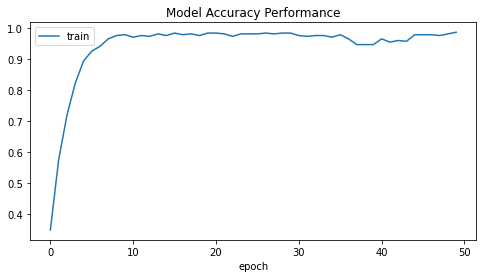

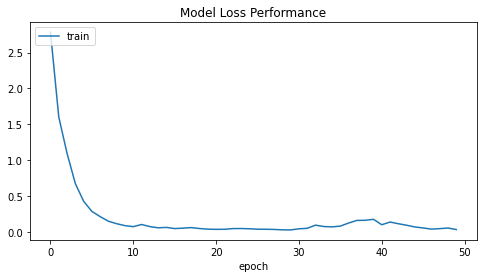

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(history_dl.history['accuracy'])
# plt.plot(history_dl.history['val_accuracy'])
plt.title('Model Accuracy Performance')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left') 
plt.show()


plt.figure(figsize=(8,4))
plt.plot(history_dl.history['loss'])
# plt.plot(history_dl.history['val_loss'])
plt.title('Model Loss Performance')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left') 
plt.show()

In [41]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

# Clear any logs from previous runs
!rm -rf ./logs/

from tensorboard.plugins.hparams import api as hp

HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([32, 64, 128]))
HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.1, 0.5))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd']))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
  hp.hparams_config(
    hparams=[HP_NUM_UNITS, HP_DROPOUT, HP_OPTIMIZER],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

from sklearn.model_selection import train_test_split

X = list(training[:, 0])
Y = list(training[:, 1])

x_train,x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)
x_train = X
y_train = Y 

session_num = 0

def train_test_model(hparams):
    model = Sequential()
    model.add(Dense(128, input_shape=input_shape, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(hparams[HP_NUM_UNITS], activation="relu"))
    model.add(Dropout(hparams[HP_DROPOUT]))
    model.add(Dense(output_shape, activation="softmax"))
    model.compile(loss='categorical_crossentropy',
                optimizer=hparams[HP_OPTIMIZER],
                metrics=["accuracy"]) 

    model.fit(x_train, y_train, epochs=50) # Run with 1 epoch to speed things up for demo purposes_, 

    accuracy = model.evaluate(x_test, y_test)
    return accuracy[1]

def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)

for num_units in HP_NUM_UNITS.domain.values:
  for dropout_rate in (HP_DROPOUT.domain.min_value, HP_DROPOUT.domain.max_value):
    for optimizer in HP_OPTIMIZER.domain.values:
      hparams = {
          HP_NUM_UNITS: num_units,
          HP_DROPOUT: dropout_rate,
          HP_OPTIMIZER: optimizer,
      }
      run_name = "run-%d" % session_num
      print('--- Starting trial: %s' % run_name)
      print({h.name: hparams[h] for h in hparams})
      run('logs/hparam_tuning/' + run_name, hparams)
      session_num += 1

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
--- Starting trial: run-0
{'num_units': 32, 'dropout': 0.1, 'optimizer': 'adam'}
Epoch 1/50
12/12 [==============================] - 0s 4ms/step - loss: 3.8646 - accuracy: 0.0637
Epoch 2/50
12/12 [==============================] - 0s 3ms/step - loss: 3.7255 - accuracy: 0.2573
Epoch 3/50
12/12 [==============================] - 0s 4ms/step - loss: 3.5356 - accuracy: 0.3050
Epoch 4/50
12/12 [==============================] - 0s 4ms/step - loss: 3.2097 - accuracy: 0.2971
Epoch 5/50
12/12 [==============================] - 0s 3ms/step - loss: 2.8691 - accuracy: 0.2971
Epoch 6/50
12/12 [==============================] - 0s 3ms/step - loss: 2.6534 - accuracy: 0.2997
Epoch 7/50
12/12 [==============================] - 0s 4ms/step - loss: 2.4657 - accuracy: 0.3369
Epoch 8/50
12/12 [==============================] - 0s 4ms/step - loss: 2.2739 - accuracy: 0.4164
Epoch 9/50
12/12 [===========================

# Function

In [28]:
# Text cosine similiarity
def get_cosine(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x]**2 for x in vec1.keys()])
    sum2 = sum([vec2[x]**2 for x in vec2.keys()])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / (denominator)


def text_to_vector(text):
    word = re.compile(r'\w+')
    words = word.findall(text)
    return Counter(words)


def kesamaan(content_a, content_b):
    text1 = " ".join(content_a)
    text2 = " ".join(content_b)

    vector1 = text_to_vector(text1)
    vector2 = text_to_vector(text2)

    cosine_result = get_cosine(vector1, vector2)
    return cosine_result

In [29]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stem_text(text):
    # sastrawi stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(text)


def clean_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens]
    return tokens


def bag_of_words(text, vocab):
    tokens = clean_text(text)
    bow = [0] * len(vocab)
    for w in tokens:
        for idx, word in enumerate(vocab):
            if kesamaan(word,w) > 0.90:
                print(word,'<=>',w,kesamaan(word,w))
                bow[idx] = 1
    return np.array(bow)


def pred_class(text, vocab, labels):
    bow = bag_of_words(text, vocab)
    result = model.predict(np.array([bow]))[0]
    print(bow)
    # melakukan iterasi dari seluruh kemungkinan kelas
    thresh = 0.5
    y_pred = [[idx, res] for idx, res in enumerate(result) if res > thresh]

    y_pred.sort(key=lambda x: x[1], reverse=True)
    print(y_pred)
    return_list = []

    for r in y_pred:
        return_list.append(labels[r[0]])
    if (len(return_list)) == 0:
        return ["no_response"]
    else:
        return return_list

def pred_class_ml(text, vocab, labels):
    bow = bag_of_words(text, vocab)
    result = model_ml.predict(np.array([bow]))[0]
    thresh = 0.5
    y_pred = [[idx, res] for idx, res in enumerate(result) if res > thresh]

    y_pred.sort(key=lambda x: x[1], reverse=True)
    return_list = []

    for r in y_pred:
        return_list.append(labels[r[0]])
    if (len(return_list)) == 0:
        return ["no_response"]
    else:
        return return_list


def get_response(intents_list, intents_json):
    tag = intents_list[0]
    list_of_intents = intents_json["intents"]
    for i in list_of_intents:
        if i["tag"] == tag:
            result = random.choice(i["responses"])
            break
    return result

# Test reponse

In [35]:
intext = input("Masukkan : ")
intext = stem_text(intext)
print(intext)
intent = pred_class(intext, words, classes)
print(intent)
get_response(intent,data)

bayar ukt gagal
abar <=> bayar 0.9258200997725514
bayar <=> bayar 0.9999999999999999
ukt <=> ukt 1.0000000000000002
gagal <=> gagal 1.0
tanggal <=> gagal 0.9045340337332909
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
[[44, 0.9999168]]
['tata cara pembayaran']


'Untuk melakukan pembayaran UKT, SPP, IPI dapat dilihat pada laman https://selma.ub.ac.id/tata-cara-pembayaran/https://selma.ub.ac.id/tata-cara-pembayaran/'

# Save model

In [ ]:
model.save('model_chatbot.h5')

In [ ]:
pickle.dump(model_ml,open('modelml_chatbot.pkl', 'wb'))

In [ ]:
pickle.format_version

'4.0'

# Experiment text similiarity

In [ ]:
kesamaan('agastya','saya')

0.9058216273156767

In [ ]:
kesamaan('siswa','mahasiswa')

0.82502864732539